<a href="https://colab.research.google.com/github/amadords/Projetos-Publicos/blob/master/Churn_Prediction_para_Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Churn Prediction para Telecom**
---
[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-cyan.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-white.svg)](https://daniel-s-amador.medium.com/)

![img](https://t3.ftcdn.net/jpg/02/98/81/74/360_F_298817415_P2kedm3RPPFWL24RGttIjwuRAUaJDPwT.webp)

**Churn**, **Crosselling** e **Upsell** são, sem dúvidas, métricas que podem demonstrar a saúde de uma empresa. 

- O **Churn** nos diz quanto uma empresa perdeu de clientes ou receita.

- O **Crosselling** permite que o cliente realize uma compra de produtos relacionados a um produto antes comprado.

- O **Upsell** basicamente, consiste em melhorar a compra inicial do cliente, dando oportunidade para a pessoa adquirir um item mais completo do que aquele que ela já tinha escolhido anteriormente.

Na prática, essas duas últimas são essencialmente serviços, mas em uma **Análise de BI** podem ser utilizadas juntas para visualizar correlações.

Aqui, nossos esforços serão voltados para o **Churn Rate**, ou seja, para a taxa de evasão de clientes. Utilizaremos os seguintes **atributos** para fazer a previsão:

* `customerID` - ID do Cliente
* `gender` - Gênero (Se Masculino ou Feminino)
* `SeniorCitizen` - Se é idoso. 0 se não é e 1 para se é.
* `Partner` - Se tem parceiro ou parceira
* `Dependents` - Se possui  dependentes
* `tenure` - Quantidade de tempo que um cliente permanece assinando determinado serviço
* `PhoneService` - Serviço de Telefone
* `MultipleLines` - Se possui  múltiplas linhas
* `InternetService` -  Tipo de serviço de internet
* `OnlineSecurity` - Se possui segurança online
* `OnlineBackup` - Se possui 
 backup online
* `DeviceProtection` - Se possui proteção de dispositivo
* `TechSupport` - Se possui suporte técnico
* `StreamingTV` - Se possui Streaming de TV
* `StreamingMovies` - Se possui Streaming de filmes
* `Contract` - Tipo de Contrato
* `PaperlessBilling` - Se possui cobrança via papel
* `PaymentMethod` - Qual o método de pagamento
* `MonthlyCharges` - Cobrança Mensal
* `TotalCharges` - Custo Total
* `Churn` - Se Churn

A **predição de Churn** será feita para uma empresa de **Telecom** ou **Telecomunicação** que, segunda a [nativa](https://navita.com.br/blog/telecom-o-que-e-saiba-tudo-sobre-o-setor-de-telecomunicacoes/), é um segmento que permite a troca de informações por distâncias de forma significativa, por meio de transmissão de voz, dados e vídeo.

Com a predição podemos  identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais baixo que o custo para mantê-los. Ou seja, um alto valor para o churn rate é o que não desejamos.

## **Aquisição dos Dados**

Os dados utilizados são originais da [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#).

Infelizmente, até por questão de sigilo, a base de dados se limita à aspectos generalistas, contudo os nomes das colunas permitem um entendimento a respeito do problema do negócio.

**Importando bibliotecas necessárias**

In [1]:
!pip install scikit-plot -q
!pip install imbalanced-learn -q

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

**Importação dos dados**
> Além da leitura dos primeiros dados.

In [2]:
# carregando os dados
PATH = 'https://raw.githubusercontent.com/amadords/data/main/telecom-churn.csv'
df = pd.read_csv(PATH)

# leitura dos dados
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Tamanho do dataset**

In [3]:
print("Linhas:\t\t{}".format(df.shape[0]))
print("Colunas:\t{}".format(df.shape[1]))

Linhas:		7043
Colunas:	21


## **Análise Exploratória**

> Visualizando algumas informações do dataset para visualizar se ele está apto à utilização e o quanto estão íntegros e usáveis.

**Total de dados ausentes**

In [4]:
print("Dados ausentes (total):\t{}\n".format(df.isnull().sum().values.sum()))

Dados ausentes (total):	0



**Dados ausentes por coluna**

> Embora estejam com as colunas zeradas, mais à frente veremos que, na verdade, há sim valores ausentes. O problema tem a ver com o tipo de dado presente nas colunas.

In [5]:
print(df.isnull().sum() / df.shape[0])

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


**Visualizando o nome das Features**

In [6]:
print("\nNomes das features:\n{}\n".format(df.columns.values))


Nomes das features:
['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']



**Valores únicos por coluna**

In [7]:
print("Valores únicos (por coluna):\n{}\n".format(df.nunique()))

Valores únicos (por coluna):
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64



**Tipo de dado por coluna**

In [8]:
print("Tipos de Variáveis (por coluna)\n{}".format(df.dtypes))

Tipos de Variáveis (por coluna)
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


**Observações iniciais**

* `costumerID` somente possui identificadores únicos para cada cliente e deverá ser dropada.

* `Churn` é nossa variável alvo.

* `TotalCharges` deveria ser um *float*, mas está como *string*.

    * Como já mencionado anteriormente, apesar termos detectado nenhum valor ausente, algumas strings que representam valores ausentes.
* Várias features precisam ser codificadas para valores numéricos.


**Convertendo *string* em *float***

> `df["TotalCharges"].astype('float32')` não funciona neste caso, uma vez que os valores `NaN` foram lançados erroneamente, sendo colocada a string `""` em seu lugar. Mesmo com `float("")` retorna um erro.

> Após a identificação dos dados faltantes, eles são substituidos pela mediana.

> Aproveitando, vamos apagar a coluna `customerID`.

In [9]:
def converter_str_float(entrada):
    """
    Converte um objeto do tipo string em float.

    # Arguments
        entrada: string, string da coluna TotalCharges.

    # Returns
        Valor convertido em float, caso permita a conversão.
        NaN, caso o valor não seja apropriado.
    """

    try:
        return float(entrada)
    except ValueError:
        return np.nan

# criando cópia do dataframe
df_clean = df.copy()

# removendo coluna costumerID
df_clean.drop("customerID", axis=1, inplace=True)

# convertendo as strings de TotalCharges para float
df_clean["TotalCharges"] = df_clean["TotalCharges"].apply(converter_str_float)

# verificando entradas ausentes
print("Dados ausentes em 'TotalCharges' (antes):\t{}\n".format(df_clean["TotalCharges"].isnull().sum()))

# substituindo os dados ausentes pelo valor da mediana
TotalChargesMedian = df_clean.TotalCharges.median()
df_clean["TotalCharges"].fillna(TotalChargesMedian, inplace=True)

Dados ausentes em 'TotalCharges' (antes):	11



**Resumo estatístico para valores numéricos**
> Aqui é visualizado que não há indícios de *outliers*.

In [10]:
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Plotando boxplot**

> Apenas das colunas `MonthlyCharges` e `TotalCharges` para que haja uma breve visualização.



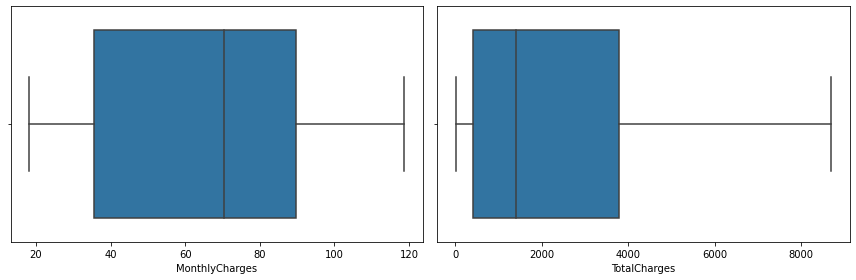

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.boxplot(df_clean['MonthlyCharges'], ax=ax[0])
sns.boxplot(df_clean['TotalCharges'], ax=ax[1])
plt.tight_layout()

>

**Resumo estatístico para valores categóricos**

> Veja que, por aqui não podemos ver muitas informações ainda. Podemos ver, por exemplo que a maior parte dos clientes na base de dados é do sexo masculino, contudo, não temos como saber ainda se a maioria das pessoas que entram nas estatísticas de *churn* são do sexo masculino.

In [12]:
df_clean.describe(include = 'O')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


**Variável `tenure`**

> Como já mencionado, está ligado ao tempo que um cliente é cliente da empresa.

> Aparentemente os dados estão em meses, logo o intervalo vai de 0 meses até 72 meses, ou seja, até 6 anos.

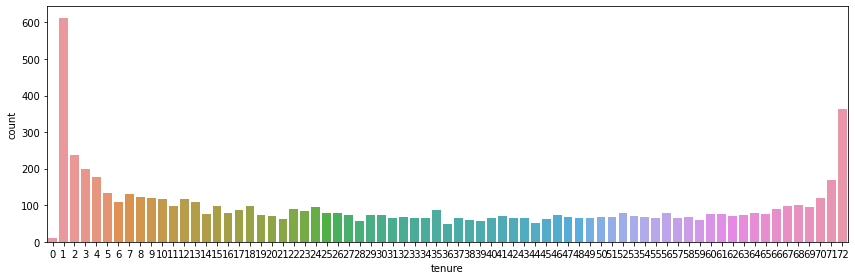

In [13]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(df['tenure'])
plt.tight_layout()

**Visualizando os valores únicos para todas as variáveis categóricas**

In [14]:
np.unique(df_clean.select_dtypes('object').values)

array(['Bank transfer (automatic)', 'Credit card (automatic)', 'DSL',
       'Electronic check', 'Female', 'Fiber optic', 'Mailed check',
       'Male', 'Month-to-month', 'No', 'No internet service',
       'No phone service', 'One year', 'Two year', 'Yes'], dtype=object)

**Verificando a contagem de clientes por sexo**

> Veja que a base de dados está muito equilibrada.

Male      3555
Female    3488
Name: gender, dtype: int64


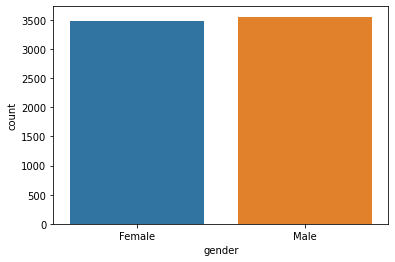

In [15]:
print(df_clean.gender.value_counts())
sns.countplot(df.gender);

**Vamos visualizar a quantidade de *churn* por sexo**

> Tal qual o equilíbrio na base de dados, está equilibrado também na contagem.

In [16]:
df_clean.groupby('Churn')['gender'].value_counts()

Churn  gender
No     Male      2625
       Female    2549
Yes    Female     939
       Male       930
Name: gender, dtype: int64

## **Preparação dos Dados**

> As features que possuiam dois labels únicos serão processadas utilizando o `LabelEncoder`.

> As variáveis numéricas serão separadas das categóricas. Estas serão transformadas em variáveis `dummy`.

In [17]:
# pré-processamento das variáveis
binary_var = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
num_var = [col for col in df_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in binary_var]
cat_var = [col for col in df_clean.columns.tolist() if col not in binary_var + num_var]

# criando cópia do dataframe
df_proc = df_clean.copy()

# Label Encoding para as variáveis Binárias
le = LabelEncoder()
for i in binary_var:
    df_proc[i] = le.fit_transform(df_proc[i])

# Encoding para colunas categóricas com múltiplas classes
df_proc = pd.get_dummies(df_proc, columns=cat_var)

# visualizando as 5 primeiras entradas do novo dataframe
df_proc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


## **Modelo de Machine Learning**

In [18]:
# separação das features e variável alvo
X = df_proc.drop('Churn', axis=1)
y = df_proc['Churn']

# dividisão dos dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

**Criando função para avaliação**

> Essa função utilizará a métrica `recall` para avaliar o modelo.

> Também será utilizado um `pipeline` com o `StandarScaler()` e o `clf` (classificador).

In [19]:
def val_model(X, y, clf, quite=False):
    """
    Realiza cross-validation com os dados de treino para determinado modelo.

    # Arguments
        X: É um DataFrame que contém as variáveis independetes.
        y: É uma Series que contém a variável alvo.
        clf: modelo classificador do Scikit-learn.
        quite: bool, indicando se a função deve imprimir os resultados ou não.

    # Returns
        float, média dos scores da cross-validation.
    """
    
    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    if quite == False:
        print("Recall: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
    
    return scores.mean()

**Random Forest para o baseline**

> Sem nenhum tuning em seus hiperparâmetros.

> Vendo desempenho com a função `val_model` criada acima.

In [20]:
rf = RandomForestClassifier()
score_baseline = val_model(X_train, y_train, rf)

Recall: 0.49 (+/- 0.02)


**Padronizando e balanceandos os dados**

> O balanceamento deve ser feito apenas com os dados de treino.

> Utilizaremos o *Under Sampling* a fim de preservar a classe minoritária. Veja mais [aqui](https://github.com/amadords/Projetos-Publicos/blob/master/Classes_Desbalanceadas.ipynb).

In [21]:
#  padronizando os dados
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# balanceando os dados
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)

**Aplicando a validação cruzada em vários modelos e avaliando os melhores**

In [22]:
# instanciando modelos
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

model = []
recall = []
# avaliando o desempenho (recall)
for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_train_rus, y_train_rus, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['Recall']).sort_values(by='Recall', ascending=False)

,Recall
XGBClassifier,0.815927
LogisticRegression,0.804238
SVC,0.799861
RandomForestClassifier,0.787444
LGBMClassifier,0.774303
SGDClassifier,0.739149
DecisionTreeClassifier,0.699019


> A regressão logística se saiu melhor, porém pela complexidade do problema vamos utilizar para a continuação um modelo baseado em `Árvore de Decisão`.

**Fazendo tuning**

In [23]:
xgb = XGBClassifier(learning_rate=0.1)

param_grid = {
 'n_estimators':range(0,1000,50),
}

# identificando melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# visualizando os resultados
print("O melhor score é: {}, correspondente ao {}".format(grid_result.best_score_, grid_result.best_params_))

O melhor score é: 0.8225096607986261, correspondente ao {'n_estimators': 50}


In [24]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50)

param_grid = {
 'max_depth':range(1,8,1),
 'min_child_weight':range(1,5,1)
}

# identificando melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# visualizando os resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.820298411335337 para {'max_depth': 2, 'min_child_weight': 1}


In [25]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50, max_depth=1, min_child_weight=1)

param_grid = {
 'gamma':[i/10.0 for i in range(0,5)]
}

# identificando melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# visualizando os resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8122799484757406 para {'gamma': 0.0}


In [26]:
xgb = XGBClassifier(n_estimators=50, max_depth=1, min_child_weight=1, gamma=0.0)

param_grid = {
 'learning_rate':[0.001, 0.01, 0.1, 1]
}

# identificando melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# visualizando os resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8809628595963932 para {'learning_rate': 0.001}


**Treinando o modelo final com os novos hiperparâmetros**

              precision    recall  f1-score   support

           0       0.93      0.57      0.71      1261
           1       0.45      0.90      0.60       500

    accuracy                           0.66      1761
   macro avg       0.69      0.73      0.65      1761
weighted avg       0.80      0.66      0.68      1761

AUC: 0.7329



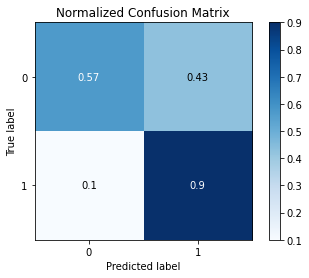

In [27]:
# modelo
xgb = XGBClassifier(learning_rate=0.001 , n_estimators=50, max_depth=1, min_child_weight=1, gamma=0.0)
xgb.fit(X_train_rus, y_train_rus)

# previsão
X_test = scaler.transform(X_test)
y_pred = xgb.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# matriz de confusão
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

In [28]:
## **Feature Importance**

> Infelizmente o `feature_importances_` não está funcionando, como pode ser visto abaixo. Vamos então utilizar um modelo de árvore mais tradicional para podermos visualizar as features mais importantes.

In [29]:
xgb.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0.], dtype=float32)

In [30]:
# instanciando o classificador
random_clf = RandomForestClassifier()

# separação das features e variável alvo
X = df_proc.drop('Churn', axis=1)
y = df_proc['Churn']

# dividisão dos dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# treinando o modelo
random_clf.fit(X_train, y_train)

# predição
resultado = random_clf.predict(X_test)

# métrica
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1280
           1       0.64      0.48      0.55       481

    accuracy                           0.78      1761
   macro avg       0.73      0.69      0.70      1761
weighted avg       0.77      0.78      0.77      1761



**Plotando as features mais importantes**

In [31]:
feature_imp = pd.Series(random_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

TotalCharges                               0.166660
tenure                                     0.150140
MonthlyCharges                             0.148989
Contract_Month-to-month                    0.053411
OnlineSecurity_No                          0.031890
PaymentMethod_Electronic check             0.030236
TechSupport_No                             0.028446
gender                                     0.028046
PaperlessBilling                           0.025894
Partner                                    0.023189
InternetService_Fiber optic                0.021792
SeniorCitizen                              0.019580
Dependents                                 0.019256
OnlineBackup_No                            0.018799
DeviceProtection_No                        0.016396
Contract_Two year                          0.015915
MultipleLines_No                           0.013825
PaymentMethod_Credit card (automatic)      0.012810
MultipleLines_Yes                          0.012496
InternetServ

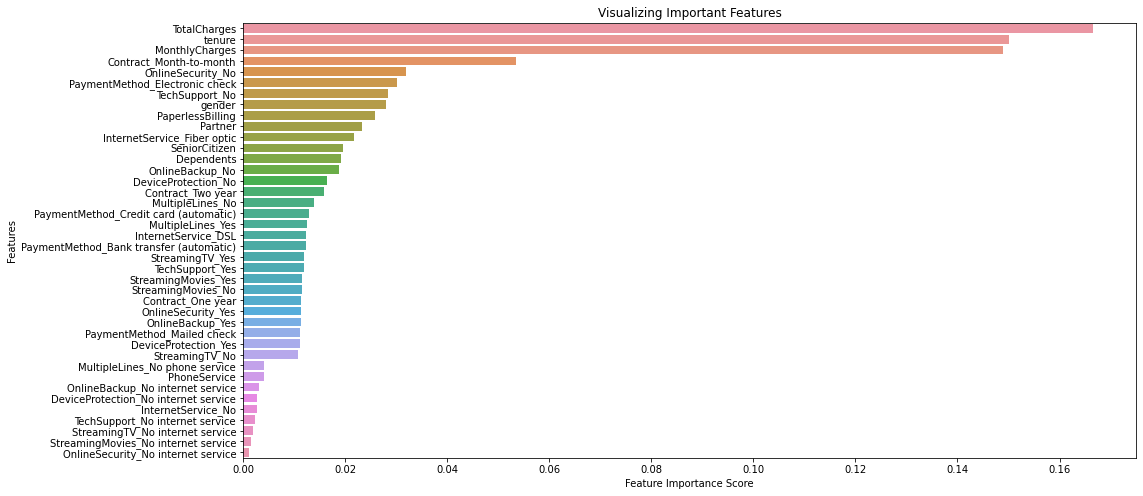

In [32]:
%matplotlib inline

def visualiza_features_importantes(features_lista):

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()
    
visualiza_features_importantes(feature_imp)

> Veja que, com exceção de `TotalCharges`, `tenure` e `MonthlyCharges`, além de `Contract_Month-to-month`, as features estão em um intervalo onde estão muito próximas. Nesse caso, talvez não seja interessante fazer uma seleção de features. 

> Para saber mais sobre esse tipo de abordagem clique [aqui](https://github.com/amadords/Projetos-Publicos/blob/master/Floresta_Aleat%C3%B3ria_(Algoritmo).ipynb).

## **Conclusão**

> Criamos um classificador com `AUC` = 0.7293. Ainda podem ser feitas outras melhorias, inclusive também ser feitas outras avaliações.

> Esse trabalho nunca tem fim e sempre pode ser melhorado.

# Obrigado!

Obrigado por ter disponibilizado um pouco do seu tempo e atenção aqui. Espero que, de alguma forma, tenha sido útil para seu crescimento. Se houver qualquer dúvida ou sugestão, não hesite em entrar em contato no [LinkedIn](https://www.linkedin.com/in/daniel-sousa-amador) e verificar meus outros projetos no [GitHub](https://github.com/amadords).

[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-cyan.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-white.svg)](https://daniel-s-amador.medium.com/)



<center><img width="90%" src="https://raw.githubusercontent.com/danielamador12/Portfolio/master/github.png"></center>